# Laboratorio 8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

%matplotlib inline

In [33]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## Ejercicio 1

(1 pto.)

Utilizando todos los datos, ajusta un modelo de regresión logística a los datos de dígitos. No agregues intercepto y define un máximo de iteraciones de 400.

Obtén el _score_ y explica el tan buen resultado.

In [5]:
logistic = LogisticRegression(fit_intercept=False, max_iter=400)
logistic.fit(digits_X, digits_y)
print(f"El score del modelo de regresión logística es {logistic.score(digits_X,digits_y)}")

El score del modelo de regresión logística es 1.0


__Respuesta:__ El modelo es perfecto porque no hay datos de calibración, solo hay datos reales, entonces se predicen a ellos mismos.

## Ejercicio 2

(1 pto.)

Utilizando todos los datos, ¿Cuál es la mejor elección del parámetro $k$ al ajustar un modelo kNN a los datos de dígitos? Utiliza valores $k=2, ..., 10$.

In [7]:
for k in range(2,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(digits_X, digits_y)
    print(f"El score del modelo de kNN con k={k} es {neigh.score(digits_X, digits_y)}")

El score del modelo de kNN con k=2 es 0.9910962715637173
El score del modelo de kNN con k=3 es 0.993322203672788
El score del modelo de kNN con k=4 es 0.9922092376182526
El score del modelo de kNN con k=5 es 0.9905397885364496
El score del modelo de kNN con k=6 es 0.989983305509182
El score del modelo de kNN con k=7 es 0.9905397885364496
El score del modelo de kNN con k=8 es 0.9894268224819143
El score del modelo de kNN con k=9 es 0.9888703394546466
El score del modelo de kNN con k=10 es 0.9855314412910406


__Respuesta:__ El mejor valor de k es 3

## Ejercicio 3

(1 pto.)

Grafica la matriz de confusión normalizada por predicción de ambos modelos (regresión logística y kNN con la mejor elección de $k$).

¿Qué conclusión puedes sacar?

Hint: Revisa el argumento `normalize` de la matriz de confusión.

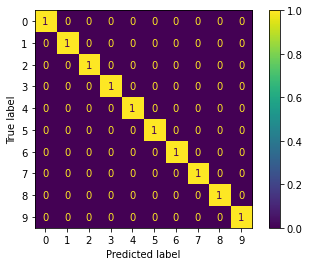

In [28]:
y_pred = logistic.predict(digits_X)
plot_confusion_matrix(logistic, digits_X, digits_y, normalize='pred');

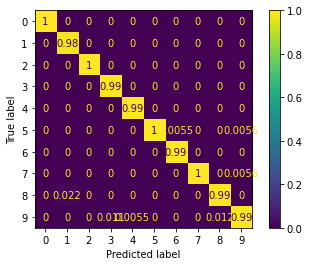

In [27]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(digits_X, digits_y)
plot_confusion_matrix(best_knn, digits_X, digits_y,normalize='pred');

__Respuesta:__ Se observa que para un score de 1 solo hay valores en la diagonal, indicando que las observaciones conocidas son las mismas que las predecidas. Para el caso del modelo kNN, el score a pesar de ser muy cercano a 1, no es exactamente 1, por lo que hay algunos valores que no predijo bien el modelo.

## Ejercicio 4

(1 pto.)

Escoge algún registro donde kNN se haya equivocado, _plotea_ la imagen y comenta las razones por las que el algoritmo se pudo haber equivocado.

In [41]:
for j in reversed(range(len(digits_y))):
    if digits_y[j]!=best_knn.predict(digits_X)[j]:
        print(f"El valor real es {digits_y[j]}")
        print(f"El valor predicho es {best_knn.predict(digits_X)[j]}")
        print(f"La iteración es {j}")
        break

El valor real es 8
El valor predicho es 1
La iteración es 1790


El valor real del registro seleccionado es

In [42]:
i = 1790
digits_y[i]

8

Mentras que la predicción dada por kNN es

In [43]:
best_knn.predict(digits_X)[i]

1

A continuación la imagen

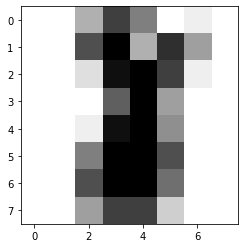

In [44]:
plt.imshow(digits_X.loc[[i], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');

__Respuesta:__ La imagen no es clara, no parece un 8. Ni yo puedo identificar bien que es.